### Train different model and choose the best to be used

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [51]:
cleaned_data = pd.read_csv('Top_rated_movies_Cleaned.csv')

In [52]:
cleaned_data

,id,title,vote_average,vote_count,popularity,year,month,day,weighted_rating,is_sequel,engagement_score,popularity_tier
0,278,The Shawshank Redemption,8.711,29158,25.3318,1994,9,23,8.546163,0,220.665310,Platinum
1,238,The Godfather,8.685,22026,26.3705,1972,3,14,8.475210,0,229.027793,Platinum
2,240,The Godfather Part II,8.571,13315,13.4802,1974,12,20,8.265197,1,115.538794,Platinum
3,424,Schindler's List,8.566,16836,10.6071,1993,12,15,8.316227,0,90.860419,Platinum
4,389,12 Angry Men,8.548,9503,9.0143,1957,4,10,8.150957,1,77.054236,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,11310,City Slickers II: The Legend of Curly's Gold,5.300,327,1.2015,1994,6,10,6.551255,1,6.367950,Bronze
9969,9651,Supergirl,5.300,631,3.0597,1984,7,1,6.434049,0,16.216410,Silver
9970,37534,The New Daughter,5.301,370,1.6478,2009,12,18,6.533351,0,8.734988,Bronze
9971,665828,Bigbug,5.300,447,3.5664,2022,2,11,6.502209,0,18.901920,Gold


In [53]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                9973 non-null   int64  
 1   title             9973 non-null   object 
 2   vote_average      9973 non-null   float64
 3   vote_count        9973 non-null   int64  
 4   popularity        9973 non-null   float64
 5   year              9973 non-null   int64  
 6   month             9973 non-null   int64  
 7   day               9973 non-null   int64  
 8   weighted_rating   9973 non-null   float64
 9   is_sequel         9973 non-null   int64  
 10  engagement_score  9973 non-null   float64
 11  popularity_tier   9973 non-null   object 
dtypes: float64(4), int64(6), object(2)
memory usage: 935.1+ KB


In [54]:
# Separating Features from Target

X = cleaned_data.drop(['popularity', 'title', 'popularity_tier'], axis =1)
y = cleaned_data['popularity'] 

In [55]:
X.head()

,id,vote_average,vote_count,year,month,day,weighted_rating,is_sequel,engagement_score
0,278,8.711,29158,1994,9,23,8.546163,0,220.665310
1,238,8.685,22026,1972,3,14,8.475210,0,229.027793
2,240,8.571,13315,1974,12,20,8.265197,1,115.538794
3,424,8.566,16836,1993,12,15,8.316227,0,90.860419
4,389,8.548,9503,1957,4,10,8.150957,1,77.054236


In [56]:
y.head()

0    25.3318
1    26.3705
2    13.4802
3    10.6071
4     9.0143
Name: popularity, dtype: float64

### TRAIN TEST SPLIT

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X.shape, X_train.shape, X_test.shape

((9973, 9), (7978, 9), (1995, 9))

### MODEL TRAINING

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [61]:
rfr_test_data_pred = rfr_model.predict(X_test)

### Model Evaluation

In [62]:
from sklearn.metrics import mean_absolute_error, r2_score

In [63]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rfr_test_data_pred)}")
print(f"R2 Score: {r2_score(y_test, rfr_test_data_pred)}")

Mean Absolute Error: 0.09270962055137848
R2 Score: 0.9504826733869193


In [65]:
# Plotting
import matplotlib.pyplot as plt

Text(0, 0.5, 'Predicted Popularity')

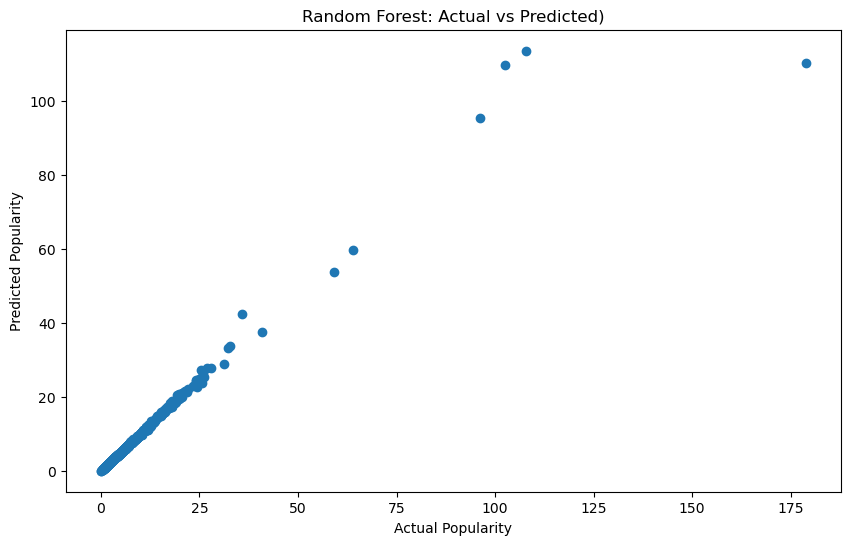

In [68]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rfr_test_data_pred)
plt.title('Random Forest: Actual vs Predicted)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

### Using LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
lr_test_data_pred = lr_model.predict(X_test_scaled)
print(f"MAE: {mean_absolute_error(y_test, lr_test_data_pred)}")
print(f"R2: {r2_score(y_test, lr_test_data_pred)}")

MAE: 0.33857521198162194
R2: 0.991567558678936


Text(0, 0.5, 'Predicted Popularity')

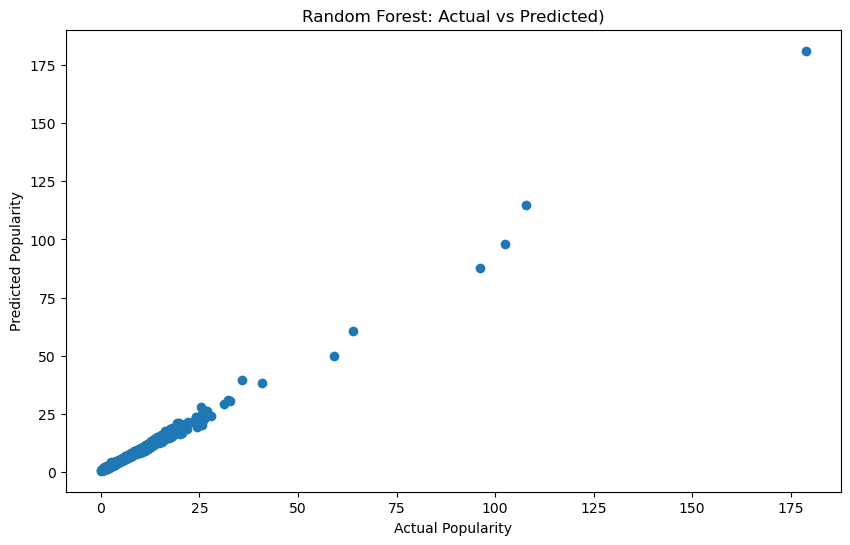

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_test_data_pred)
plt.title('Random Forest: Actual vs Predicted)')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')

## CONCLUSION:

**I'd be using Random forest regressor, bacause of suspected overfitting**

### PICKLING

In [71]:
import pickle
pickle.dump(rfr_model, open('rfr_model.pkl', 'wb'))